In [1]:
import numpy as np
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import cx_Oracle
from IPython.display import display
%matplotlib inline

#import warnings
#warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('jianfeng_active_and_no_active_sp_customers.xlsx', sheet_name='no_active_sp_customers')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 21 columns):
CM2_GROUP         56 non-null object
Belgium           55 non-null float64
Bulgaria          53 non-null float64
Croatia           50 non-null float64
Czech             54 non-null float64
Denmark           55 non-null float64
Deutschland       56 non-null int64
Finland           55 non-null float64
France            56 non-null int64
Hungary           55 non-null float64
International     53 non-null float64
Italy             56 non-null int64
Netherlands       55 non-null float64
Poland            55 non-null float64
Romania           54 non-null float64
Slovakia          52 non-null float64
Slovenia          51 non-null float64
Spain             56 non-null int64
Sweden            55 non-null float64
Switzerland       53 non-null float64
United Kingdom    56 non-null int64
dtypes: float64(15), int64(5), object(1)
memory usage: 9.3+ KB


In [4]:
data.fillna(0).head()

,CM2_GROUP,Belgium,Bulgaria,Croatia,Czech,Denmark,Deutschland,Finland,France,Hungary,...,Italy,Netherlands,Poland,Romania,Slovakia,Slovenia,Spain,Sweden,Switzerland,United Kingdom
0,other,0.0,0.0,0.0,0.0,0.0,23,0.0,9,0.0,...,3,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1
1,lower than -35%,12.0,1.0,0.0,2.0,6.0,1284,5.0,86,3.0,...,383,37.0,79.0,2.0,0.0,0.0,54,14.0,8.0,182
2,"[-35%, -30%]",1.0,2.0,0.0,0.0,2.0,177,1.0,25,2.0,...,33,16.0,49.0,0.0,0.0,0.0,30,3.0,1.0,96
3,"[-30%, -25%]",4.0,0.0,0.0,2.0,3.0,237,7.0,39,7.0,...,45,24.0,43.0,3.0,0.0,0.0,68,7.0,1.0,258
4,"[-25%, -20%]",7.0,3.0,0.0,5.0,10.0,412,1.0,96,32.0,...,84,70.0,56.0,10.0,2.0,0.0,163,14.0,2.0,672


In [5]:
ec_thresholds = {}

In [6]:
data.CM2_GROUP.unique()

array(['other', 'lower than -35%', '[-35%, -30%]', '[-30%, -25%]',
       '[-25%, -20%]', '[-20%, -15%]', '[-15%, -10%]', -0.1, -0.09, -0.08,
       -0.07, -0.06, -0.05, -0.04, -0.03, -0.02, -0.01, 0, 0.01, 0.02,
       0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13,
       0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24,
       0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34,
       '[35%, 40%]', '[40%, 45%]', '[45%, 50%]', 'above 50%'],
      dtype=object)

In [7]:
ec_thres = pd.read_excel('ec_tier_thresholds.xlsx')

In [8]:
# Low Tier thresholds for entering Existing Customers Savings Plan
ec_thres[ec_thres['Tier Id'] == 4]

,Shop,Type,Tier Id,CM2 Threshold
0,Default,New,4,0.15
2,zooplus.co.uk,New,4,0.10
4,zooplus.fr,New,4,0.12
6,zooplus.nl,New,4,0.12
8,zooplus.pl,New,4,0.10
10,zooplus.ie,New,4,0.10
12,zooplus.es,New,4,0.12
14,zoohit.cz,New,4,0.12
16,zooplus.fi,New,4,0.12
18,zoohit.sk,New,4,0.12


In [9]:
# High Tier thresholds for entering Existing Customers Savings Plan
ec_thres[ec_thres['Tier Id'] == 5]

,Shop,Type,Tier Id,CM2 Threshold
1,Default,New,5,0.25
3,zooplus.co.uk,New,5,0.20
5,zooplus.fr,New,5,0.22
7,zooplus.nl,New,5,0.22
9,zooplus.pl,New,5,0.20
11,zooplus.ie,New,5,0.22
13,zooplus.es,New,5,0.22
15,zoohit.cz,New,5,0.22
17,zooplus.fi,New,5,0.22
19,zoohit.sk,New,5,0.22


In [10]:
site_thres_low_tier = {i: j for i, j in list(zip(ec_thres[ec_thres['Tier Id'] == 4]['Shop'].values, 
                     ec_thres[ec_thres['Tier Id'] == 4]['CM2 Threshold'].values))}

In [11]:
site_thres_high_tier = {i: j for i, j in list(zip(ec_thres[ec_thres['Tier Id'] == 5]['Shop'].values, 
                     ec_thres[ec_thres['Tier Id'] == 5]['CM2 Threshold'].values))}

In [12]:
site_thres_low_tier

{'Default': 0.15,
 'zoochic-eu.ru': 0.1,
 'zoohit.cz': 0.12,
 'zoohit.si': 0.12,
 'zoohit.sk': 0.12,
 'zooplus.bg': 0.12,
 'zooplus.ch': 0.2,
 'zooplus.co.uk': 0.1,
 'zooplus.es': 0.12,
 'zooplus.fi': 0.12,
 'zooplus.fr': 0.12,
 'zooplus.gr': 0.06,
 'zooplus.hr': 0.1,
 'zooplus.hu': 0.1,
 'zooplus.ie': 0.1,
 'zooplus.nl': 0.12,
 'zooplus.no': 0.12,
 'zooplus.pl': 0.1,
 'zooplus.pt': 0.1,
 'zooplus.ro': 0.1,
 'zooplus.se': 0.12}

In [13]:
site_thres_high_tier

{'Default': 0.25,
 'zoochic-eu.ru': 0.2,
 'zoohit.cz': 0.22,
 'zoohit.si': 0.22,
 'zoohit.sk': 0.22,
 'zooplus.bg': 0.22,
 'zooplus.ch': 0.35,
 'zooplus.co.uk': 0.2,
 'zooplus.es': 0.22,
 'zooplus.fi': 0.22,
 'zooplus.fr': 0.22,
 'zooplus.gr': 0.18,
 'zooplus.hr': 0.2,
 'zooplus.hu': 0.2,
 'zooplus.ie': 0.22,
 'zooplus.nl': 0.22,
 'zooplus.no': 0.25,
 'zooplus.pl': 0.2,
 'zooplus.pt': 0.22,
 'zooplus.ro': 0.22,
 'zooplus.se': 0.25}

In [14]:
data.columns[1:]

Index(['Belgium', 'Bulgaria', 'Croatia', 'Czech', 'Denmark', 'Deutschland',
       'Finland', 'France', 'Hungary', 'International', 'Italy', 'Netherlands',
       'Poland', 'Romania', 'Slovakia ', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'United Kingdom'],
      dtype='object')

In [15]:
site_thres_low_tier['Czech'] = site_thres_low_tier['zoohit.cz'] 
site_thres_low_tier['Slovenia'] = site_thres_low_tier['zoohit.si'] 
site_thres_low_tier['Slovakia '] = site_thres_low_tier['zoohit.sk'] 
site_thres_low_tier['Bulgaria'] = site_thres_low_tier['zooplus.bg'] 
site_thres_low_tier['Croatia'] = site_thres_low_tier['zooplus.hr'] 
site_thres_low_tier['Denmark'] = 0.15
site_thres_low_tier['Deutschland'] = 0.15
site_thres_low_tier['Italy'] = 0.15
site_thres_low_tier['Belgium'] = 0.15
site_thres_low_tier['International'] = 0.15
site_thres_low_tier['Finland'] = site_thres_low_tier['zooplus.fi'] 
site_thres_low_tier['France'] = site_thres_low_tier['zooplus.fr'] 
site_thres_low_tier['Hungary'] = site_thres_low_tier['zooplus.hu'] 
site_thres_low_tier['Netherlands'] = site_thres_low_tier['zooplus.nl']  
site_thres_low_tier['Poland'] = site_thres_low_tier['zooplus.pl'] 
site_thres_low_tier['Romania'] = site_thres_low_tier['zooplus.ro'] 
site_thres_low_tier['Spain'] = site_thres_low_tier['zooplus.es']
site_thres_low_tier['Sweden'] = site_thres_low_tier['zooplus.se'] 
site_thres_low_tier['Switzerland'] = site_thres_low_tier['zooplus.ch'] 
site_thres_low_tier['United Kingdom'] = site_thres_low_tier['zooplus.co.uk']

In [16]:
site_thres_high_tier['Czech'] = site_thres_high_tier['zoohit.cz'] 
site_thres_high_tier['Slovenia'] = site_thres_high_tier['zoohit.si'] 
site_thres_high_tier['Slovakia '] = site_thres_high_tier['zoohit.sk'] 
site_thres_high_tier['Bulgaria'] = site_thres_high_tier['zooplus.bg'] 
site_thres_high_tier['Croatia'] = site_thres_high_tier['zooplus.hr'] 
site_thres_high_tier['Denmark'] = 0.25
site_thres_high_tier['Deutschland'] = 0.25
site_thres_high_tier['Italy'] = 0.25
site_thres_high_tier['Belgium'] = 0.25
site_thres_high_tier['International'] = 0.25
site_thres_high_tier['Finland'] = site_thres_high_tier['zooplus.fi'] 
site_thres_high_tier['France'] = site_thres_high_tier['zooplus.fr'] 
site_thres_high_tier['Hungary'] = site_thres_high_tier['zooplus.hu'] 
site_thres_high_tier['Netherlands'] = site_thres_high_tier['zooplus.nl']  
site_thres_high_tier['Poland'] = site_thres_high_tier['zooplus.pl'] 
site_thres_high_tier['Romania'] = site_thres_high_tier['zooplus.ro'] 
site_thres_high_tier['Spain'] = site_thres_high_tier['zooplus.es']
site_thres_high_tier['Sweden'] = site_thres_high_tier['zooplus.se'] 
site_thres_high_tier['Switzerland'] = site_thres_high_tier['zooplus.ch'] 
site_thres_high_tier['United Kingdom'] = site_thres_high_tier['zooplus.co.uk']

In [17]:
ec_thres[ec_thres['Tier Id'] == 4]['CM2 Threshold'].min(), ec_thres[ec_thres['Tier Id'] == 4]['CM2 Threshold'].max()

(0.06, 0.2)

In [18]:
ec_thres[ec_thres['Tier Id'] == 5]['CM2 Threshold'].min(), ec_thres[ec_thres['Tier Id'] == 5]['CM2 Threshold'].max()

(0.18, 0.35)

In [19]:
def get_number_from_string(i):
    if str(i).startswith('['):
        change = str(i).replace('[', '').replace(']', '')
        ch_0 = change.split(', ')[0]
        ch_1 = change.split(', ')[1]
        ch0 = float(ch_0.replace('%', '')) / 100
        ch1 = float(ch_1.replace('%', '')) / 100
        changes = (ch0 + ch1) / 2
    elif str(i) == 'above 50%':
        changes = 0.5
    elif str(i) == 'lower than -35%':
        changes = -0.35
    elif str(i) ==  'other':
        changes = 0
    else:
        changes = float(i)
    return changes

In [20]:
data['CM2_GROUP'] = data['CM2_GROUP'].map(get_number_from_string)

In [21]:
data.CM2_GROUP.unique()

array([ 0.   , -0.35 , -0.325, -0.275, -0.225, -0.175, -0.125, -0.1  ,
       -0.09 , -0.08 , -0.07 , -0.06 , -0.05 , -0.04 , -0.03 , -0.02 ,
       -0.01 ,  0.01 ,  0.02 ,  0.03 ,  0.04 ,  0.05 ,  0.06 ,  0.07 ,
        0.08 ,  0.09 ,  0.1  ,  0.11 ,  0.12 ,  0.13 ,  0.14 ,  0.15 ,
        0.16 ,  0.17 ,  0.18 ,  0.19 ,  0.2  ,  0.21 ,  0.22 ,  0.23 ,
        0.24 ,  0.25 ,  0.26 ,  0.27 ,  0.28 ,  0.29 ,  0.3  ,  0.31 ,
        0.32 ,  0.33 ,  0.34 ,  0.375,  0.425,  0.475,  0.5  ])

In [22]:
data.sample(10)

,CM2_GROUP,Belgium,Bulgaria,Croatia,Czech,Denmark,Deutschland,Finland,France,Hungary,...,Italy,Netherlands,Poland,Romania,Slovakia,Slovenia,Spain,Sweden,Switzerland,United Kingdom
21,0.040,680.0,133.0,214.0,1534.0,1026.0,8157,719.0,15477,1406.0,...,4752,6574.0,10655.0,683.0,707.0,198.0,6040,1420.0,15.0,10482
23,0.060,1102.0,179.0,270.0,2280.0,1241.0,11106,968.0,19029,1353.0,...,6000,8162.0,11968.0,750.0,771.0,320.0,6620,1712.0,27.0,8837
18,0.010,309.0,103.0,135.0,745.0,722.0,4778,392.0,8579,1105.0,...,2777,3975.0,7982.0,512.0,513.0,81.0,4746,1062.0,5.0,11776
13,-0.040,81.0,31.0,42.0,200.0,279.0,1619,107.0,2136,598.0,...,1014,1193.0,2802.0,206.0,180.0,18.0,2121,399.0,3.0,7977
12,-0.050,51.0,26.0,23.0,124.0,210.0,1412,74.0,1565,444.0,...,824,966.0,1980.0,131.0,144.0,12.0,1766,341.0,NaN,6828
48,0.310,258.0,16.0,27.0,378.0,512.0,5293,164.0,1666,31.0,...,824,1439.0,842.0,36.0,61.0,124.0,233,158.0,1755.0,131
52,0.375,379.0,28.0,37.0,592.0,704.0,8832,200.0,2919,28.0,...,928,2178.0,1105.0,43.0,92.0,190.0,372,233.0,5830.0,246
1,-0.350,12.0,1.0,NaN,2.0,6.0,1284,5.0,86,3.0,...,383,37.0,79.0,2.0,NaN,NaN,54,14.0,8.0,182
38,0.210,953.0,73.0,184.0,1711.0,1871.0,21092,1066.0,9207,244.0,...,4471,5271.0,3843.0,235.0,263.0,479.0,1889,1033.0,963.0,1001
11,-0.060,37.0,19.0,16.0,100.0,158.0,1150,67.0,1258,394.0,...,643,749.0,1475.0,122.0,108.0,8.0,1412,263.0,1.0,5859


In [23]:
for i in data.columns[1:]:
    print(i, '| Low Tier: ', site_thres_low_tier[i], '| High Tier: ', site_thres_high_tier[i])

Belgium | Low Tier:  0.15 | High Tier:  0.25
Bulgaria | Low Tier:  0.12 | High Tier:  0.22
Croatia | Low Tier:  0.1 | High Tier:  0.2
Czech | Low Tier:  0.12 | High Tier:  0.22
Denmark | Low Tier:  0.15 | High Tier:  0.25
Deutschland | Low Tier:  0.15 | High Tier:  0.25
Finland | Low Tier:  0.12 | High Tier:  0.22
France | Low Tier:  0.12 | High Tier:  0.22
Hungary | Low Tier:  0.1 | High Tier:  0.2
International | Low Tier:  0.15 | High Tier:  0.25
Italy | Low Tier:  0.15 | High Tier:  0.25
Netherlands | Low Tier:  0.12 | High Tier:  0.22
Poland | Low Tier:  0.1 | High Tier:  0.2
Romania | Low Tier:  0.1 | High Tier:  0.22
Slovakia  | Low Tier:  0.12 | High Tier:  0.22
Slovenia | Low Tier:  0.12 | High Tier:  0.22
Spain | Low Tier:  0.12 | High Tier:  0.22
Sweden | Low Tier:  0.12 | High Tier:  0.25
Switzerland | Low Tier:  0.2 | High Tier:  0.35
United Kingdom | Low Tier:  0.1 | High Tier:  0.2


In [24]:
writer = pd.ExcelWriter('low_tier_thresholds_for_EC_SP.xlsx', engine='xlsxwriter')
workbook = writer.book
format1 = workbook.add_format({'num_format': '0.00'})

for i in data.columns[1:]:
    cus_data = data[['CM2_GROUP', i]]
    cus_amount = cus_data[i].sum()
    print(str(i))
    print('')
    print('Total amount of customers : ', cus_amount)
    df = pd.DataFrame(columns=['LOW_TIER_THRESHOLD_%', 'ELIG_CUS', 'PERC'])
    for j in ['0.01', '0.02', '0.03', '0.04','0.05', '0.06', '0.07', '0.08', 
              '0.09', '0.1', '0.11', '0.12', '0.13', '0.14', '0.15', 
              '0.16', '0.17', '0.18', '0.19', '0.20']:
        cus_elig_amount = cus_data[cus_data['CM2_GROUP'] >= float(j)][i].sum()
        elig_perc = cus_elig_amount / cus_amount * 100
        #print('Total amount of eligible customers for renewal threshold ' + str(float(j) * 100) + '% :' , cus_elig_amount)
        #print('Percentage of eligible customers for renewal threshold ' + str(float(j) * 100) + '% :' , np.round(elig_perc, 2))
        l = list([float(j) * 100, cus_elig_amount, elig_perc])
        df1 = pd.DataFrame([l], columns=df.columns)
        df = df.append(df1, ignore_index=True)
        df['ELIG_CUS'] = df['ELIG_CUS'].astype(int)
    display(df.round(2))
    df.round(2).to_excel(writer, sheet_name=i, index=False, encoding='utf-8', startrow=0, startcol=0)
    print('_______________________________________')
    print('')
    
writer.save()

Belgium

Total amount of customers :  36505.0


,LOW_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,1.0,35566,97.43
1,2.0,35257,96.58
2,3.0,34774,95.26
3,4.0,34203,93.69
4,5.0,33523,91.83
5,6.0,32561,89.20
6,7.0,31459,86.18
7,8.0,30085,82.41
8,9.0,28501,78.07
9,10.0,26752,73.28


_______________________________________

Bulgaria

Total amount of customers :  4183.0


,LOW_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,1.0,3788,90.56
1,2.0,3685,88.09
2,3.0,3583,85.66
3,4.0,3447,82.40
4,5.0,3314,79.23
5,6.0,3149,75.28
6,7.0,2970,71.00
7,8.0,2765,66.10
8,9.0,2528,60.44
9,10.0,2305,55.10


_______________________________________

Croatia

Total amount of customers :  6826.0


,LOW_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,1.0,6378,93.44
1,2.0,6243,91.46
2,3.0,6066,88.87
3,4.0,5852,85.73
4,5.0,5638,82.60
5,6.0,5363,78.57
6,7.0,5093,74.61
7,8.0,4778,70.00
8,9.0,4454,65.25
9,10.0,4113,60.25


_______________________________________

Czech

Total amount of customers :  65687.0


,LOW_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,1.0,63096,96.06
1,2.0,62351,94.92
2,3.0,61434,93.53
3,4.0,60150,91.57
4,5.0,58616,89.24
5,6.0,56779,86.44
6,7.0,54499,82.97
7,8.0,51815,78.88
8,9.0,48629,74.03
9,10.0,45191,68.80


_______________________________________

Denmark

Total amount of customers :  50446.0


,LOW_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,1.0,47366,93.89
1,2.0,46644,92.46
2,3.0,45865,90.92
3,4.0,44985,89.17
4,5.0,43959,87.14
5,6.0,42840,84.92
6,7.0,41599,82.46
7,8.0,40302,79.89
8,9.0,38844,77.00
9,10.0,37254,73.85


_______________________________________

Deutschland

Total amount of customers :  532388


,LOW_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,1.0,509250,95.65
1,2.0,504472,94.76
2,3.0,498943,93.72
3,4.0,492127,92.44
4,5.0,483970,90.91
5,6.0,474132,89.06
6,7.0,463026,86.97
7,8.0,450193,84.56
8,9.0,435398,81.78
9,10.0,418920,78.69


_______________________________________

Finland

Total amount of customers :  34317.0


,LOW_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,1.0,32955,96.03
1,2.0,32563,94.89
2,3.0,32092,93.52
3,4.0,31495,91.78
4,5.0,30776,89.68
5,6.0,29909,87.16
6,7.0,28941,84.33
7,8.0,27765,80.91
8,9.0,26477,77.15
9,10.0,24993,72.83


_______________________________________

France

Total amount of customers :  406581


,LOW_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,1.0,379903,93.44
1,2.0,371324,91.33
2,3.0,360617,88.69
3,4.0,347429,85.45
4,5.0,331952,81.64
5,6.0,314614,77.38
6,7.0,295585,72.70
7,8.0,275409,67.74
8,9.0,254393,62.57
9,10.0,233348,57.39


_______________________________________

Hungary

Total amount of customers :  26556.0


,LOW_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,1.0,19980,75.24
1,2.0,18875,71.08
2,3.0,17627,66.38
3,4.0,16317,61.44
4,5.0,14911,56.15
5,6.0,13590,51.17
6,7.0,12237,46.08
7,8.0,10909,41.08
8,9.0,9617,36.21
9,10.0,8459,31.85


_______________________________________

International

Total amount of customers :  1510.0


,LOW_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,1.0,1454,96.29
1,2.0,1443,95.56
2,3.0,1436,95.10
3,4.0,1425,94.37
4,5.0,1409,93.31
5,6.0,1388,91.92
6,7.0,1362,90.20
7,8.0,1340,88.74
8,9.0,1305,86.42
9,10.0,1266,83.84


_______________________________________

Italy

Total amount of customers :  166800


,LOW_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,1.0,154506,92.63
1,2.0,151729,90.96
2,3.0,148338,88.93
3,4.0,144444,86.60
4,5.0,139692,83.75
5,6.0,134382,80.56
6,7.0,128382,76.97
7,8.0,121802,73.02
8,9.0,114647,68.73
9,10.0,107159,64.24


_______________________________________

Netherlands

Total amount of customers :  217144.0


,LOW_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,1.0,202166,93.10
1,2.0,198191,91.27
2,3.0,193301,89.02
3,4.0,187563,86.38
4,5.0,180989,83.35
5,6.0,173776,80.03
6,7.0,165614,76.27
7,8.0,156842,72.23
8,9.0,147362,67.86
9,10.0,137469,63.31


_______________________________________

Poland

Total amount of customers :  248667.0


,LOW_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,1.0,217284,87.38
1,2.0,209302,84.17
2,3.0,200359,80.57
3,4.0,190456,76.59
4,5.0,179801,72.31
5,6.0,168603,67.80
6,7.0,156635,62.99
7,8.0,144350,58.05
8,9.0,131631,52.93
9,10.0,118823,47.78


_______________________________________

Romania

Total amount of customers :  15397.0


,LOW_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,1.0,13122,85.22
1,2.0,12610,81.90
2,3.0,12007,77.98
3,4.0,11370,73.85
4,5.0,10687,69.41
5,6.0,9976,64.79
6,7.0,9226,59.92
7,8.0,8481,55.08
8,9.0,7701,50.02
9,10.0,6948,45.13


_______________________________________

Slovakia 

Total amount of customers :  15372.0


,LOW_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,1.0,13305,86.55
1,2.0,12792,83.22
2,3.0,12155,79.07
3,4.0,11479,74.67
4,5.0,10772,70.08
5,6.0,10039,65.31
6,7.0,9268,60.29
7,8.0,8518,55.41
8,9.0,7829,50.93
9,10.0,7175,46.68


_______________________________________

Slovenia

Total amount of customers :  12123.0


,LOW_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,1.0,11900,98.16
1,2.0,11819,97.49
2,3.0,11693,96.45
3,4.0,11536,95.16
4,5.0,11338,93.52
5,6.0,11062,91.25
6,7.0,10742,88.61
7,8.0,10367,85.52
8,9.0,9934,81.94
9,10.0,9436,77.84


_______________________________________

Spain

Total amount of customers :  138028


,LOW_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,1.0,113780,82.43
1,2.0,109034,78.99
2,3.0,103693,75.12
3,4.0,97915,70.94
4,5.0,91875,66.56
5,6.0,85573,62.00
6,7.0,78953,57.20
7,8.0,72147,52.27
8,9.0,65529,47.48
9,10.0,58869,42.65


_______________________________________

Sweden

Total amount of customers :  45143.0


,LOW_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,1.0,40252,89.17
1,2.0,39190,86.81
2,3.0,38073,84.34
3,4.0,36664,81.22
4,5.0,35244,78.07
5,6.0,33626,74.49
6,7.0,31914,70.70
7,8.0,30016,66.49
8,9.0,28031,62.09
9,10.0,25958,57.50


_______________________________________

Switzerland

Total amount of customers :  35719.0


,LOW_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,1.0,35675,99.88
1,2.0,35670,99.86
2,3.0,35663,99.84
3,4.0,35651,99.81
4,5.0,35636,99.77
5,6.0,35609,99.69
6,7.0,35582,99.62
7,8.0,35535,99.48
8,9.0,35490,99.36
9,10.0,35417,99.15


_______________________________________

United Kingdom

Total amount of customers :  208894


,LOW_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,1.0,120452,57.66
1,2.0,108676,52.02
2,3.0,96948,46.41
3,4.0,85606,40.98
4,5.0,75124,35.96
5,6.0,65259,31.24
6,7.0,56422,27.01
7,8.0,48655,23.29
8,9.0,41704,19.96
9,10.0,35931,17.20


_______________________________________



In [25]:
writer = pd.ExcelWriter('high_tier_thresholds_for_EC_SP.xlsx', engine='xlsxwriter')
workbook = writer.book
format1 = workbook.add_format({'num_format': '0.00'})

for i in data.columns[1:]:
    cus_data = data[['CM2_GROUP', i]]
    cus_amount = cus_data[i].sum()
    print(str(i))
    print('')
    print('Total amount of customers : ', cus_amount)
    df = pd.DataFrame(columns=['HIGH_TIER_THRESHOLD_%', 'ELIG_CUS', 'PERC'])
    for j in ['0.15', '0.16', '0.17', '0.18','0.19', '0.20', '0.21', '0.22', 
              '0.23', '0.24', '0.25', '0.26', '0.27', '0.28', '0.29', 
              '0.30', '0.31', '0.32', '0.33', '0.34', '0.35']:
        cus_elig_amount = cus_data[cus_data['CM2_GROUP'] >= float(j)][i].sum()
        elig_perc = cus_elig_amount / cus_amount * 100
        #print('Total amount of eligible customers for renewal threshold ' + str(float(j) * 100) + '% :' , cus_elig_amount)
        #print('Percentage of eligible customers for renewal threshold ' + str(float(j) * 100) + '% :' , np.round(elig_perc, 2))
        l = list([float(j) * 100, cus_elig_amount, elig_perc])
        df1 = pd.DataFrame([l], columns=df.columns)
        df = df.append(df1, ignore_index=True)
        df['ELIG_CUS'] = df['ELIG_CUS'].astype(int)
    display(df.round(2))
    df.round(2).to_excel(writer, sheet_name=i, index=False, encoding='utf-8', startrow=0, startcol=0)
    print('_______________________________________')
    print('')
    
writer.save()

Belgium

Total amount of customers :  36505.0


,HIGH_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,15.0,16730,45.83
1,16.0,14870,40.73
2,17.0,13212,36.19
3,18.0,11690,32.02
4,19.0,10328,28.29
5,20.0,9092,24.91
6,21.0,7915,21.68
7,22.0,6962,19.07
8,23.0,5976,16.37
9,24.0,5128,14.05


_______________________________________

Bulgaria

Total amount of customers :  4183.0


,HIGH_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,15.0,1334,31.89
1,16.0,1202,28.74
2,17.0,1035,24.74
3,18.0,903,21.59
4,19.0,791,18.91
5,20.0,664,15.87
6,21.0,566,13.53
7,22.0,493,11.79
8,23.0,414,9.90
9,24.0,348,8.32


_______________________________________

Croatia

Total amount of customers :  6826.0


,HIGH_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,15.0,2522,36.95
1,16.0,2255,33.04
2,17.0,2005,29.37
3,18.0,1770,25.93
4,19.0,1548,22.68
5,20.0,1359,19.91
6,21.0,1172,17.17
7,22.0,988,14.47
8,23.0,807,11.82
9,24.0,657,9.62


_______________________________________

Czech

Total amount of customers :  65687.0


,HIGH_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,15.0,27033,41.15
1,16.0,23915,36.41
2,17.0,21069,32.07
3,18.0,18386,27.99
4,19.0,15967,24.31
5,20.0,13784,20.98
6,21.0,11927,18.16
7,22.0,10216,15.55
8,23.0,8716,13.27
9,24.0,7368,11.22


_______________________________________

Denmark

Total amount of customers :  50446.0


,HIGH_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,15.0,27373,54.26
1,16.0,25162,49.88
2,17.0,23038,45.67
3,18.0,20931,41.49
4,19.0,18925,37.52
5,20.0,16921,33.54
6,21.0,14929,29.59
7,22.0,13058,25.89
8,23.0,11393,22.58
9,24.0,9748,19.32


_______________________________________

Deutschland

Total amount of customers :  532388


,HIGH_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,15.0,309855,58.20
1,16.0,284715,53.48
2,17.0,259849,48.81
3,18.0,234732,44.09
4,19.0,210090,39.46
5,20.0,186355,35.00
6,21.0,163915,30.79
7,22.0,142823,26.83
8,23.0,123484,23.19
9,24.0,105775,19.87


_______________________________________

Finland

Total amount of customers :  34317.0


,HIGH_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,15.0,16104,46.93
1,16.0,14277,41.60
2,17.0,12504,36.44
3,18.0,10807,31.49
4,19.0,9240,26.93
5,20.0,7864,22.92
6,21.0,6666,19.42
7,22.0,5600,16.32
8,23.0,4593,13.38
9,24.0,3753,10.94


_______________________________________

France

Total amount of customers :  406581


,HIGH_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,15.0,138284,34.01
1,16.0,122976,30.25
2,17.0,108845,26.77
3,18.0,95576,23.51
4,19.0,83606,20.56
5,20.0,72384,17.80
6,21.0,62213,15.30
7,22.0,53006,13.04
8,23.0,44696,10.99
9,24.0,37569,9.24


_______________________________________

Hungary

Total amount of customers :  26556.0


,HIGH_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,15.0,4037,15.20
1,16.0,3435,12.93
2,17.0,2912,10.97
3,18.0,2424,9.13
4,19.0,1989,7.49
5,20.0,1623,6.11
6,21.0,1343,5.06
7,22.0,1099,4.14
8,23.0,874,3.29
9,24.0,703,2.65


_______________________________________

International

Total amount of customers :  1510.0


,HIGH_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,15.0,989,65.50
1,16.0,921,60.99
2,17.0,855,56.62
3,18.0,797,52.78
4,19.0,717,47.48
5,20.0,659,43.64
6,21.0,608,40.26
7,22.0,541,35.83
8,23.0,483,31.99
9,24.0,422,27.95


_______________________________________

Italy

Total amount of customers :  166800


,HIGH_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,15.0,66877,40.09
1,16.0,59475,35.66
2,17.0,52418,31.43
3,18.0,45708,27.40
4,19.0,39575,23.73
5,20.0,33812,20.27
6,21.0,28855,17.30
7,22.0,24384,14.62
8,23.0,20297,12.17
9,24.0,16737,10.03


_______________________________________

Netherlands

Total amount of customers :  217144.0


,HIGH_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,15.0,86479,39.83
1,16.0,77384,35.64
2,17.0,68747,31.66
3,18.0,60773,27.99
4,19.0,53572,24.67
5,20.0,47176,21.73
6,21.0,41283,19.01
7,22.0,36012,16.58
8,23.0,31103,14.32
9,24.0,26811,12.35


_______________________________________

Poland

Total amount of customers :  248667.0


,HIGH_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,15.0,64237,25.83
1,16.0,55840,22.46
2,17.0,48189,19.38
3,18.0,41505,16.69
4,19.0,35801,14.40
5,20.0,30720,12.35
6,21.0,26325,10.59
7,22.0,22482,9.04
8,23.0,19104,7.68
9,24.0,16244,6.53


_______________________________________

Romania

Total amount of customers :  15397.0


,HIGH_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,15.0,3769,24.48
1,16.0,3219,20.91
2,17.0,2770,17.99
3,18.0,2387,15.50
4,19.0,1994,12.95
5,20.0,1678,10.90
6,21.0,1396,9.07
7,22.0,1161,7.54
8,23.0,959,6.23
9,24.0,793,5.15


_______________________________________

Slovakia 

Total amount of customers :  15372.0


,HIGH_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,15.0,4227,27.50
1,16.0,3759,24.45
2,17.0,3357,21.84
3,18.0,2975,19.35
4,19.0,2592,16.86
5,20.0,2268,14.75
6,21.0,1948,12.67
7,22.0,1685,10.96
8,23.0,1440,9.37
9,24.0,1228,7.99


_______________________________________

Slovenia

Total amount of customers :  12123.0


,HIGH_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,15.0,6621,54.62
1,16.0,6002,49.51
2,17.0,5440,44.87
3,18.0,4866,40.14
4,19.0,4361,35.97
5,20.0,3878,31.99
6,21.0,3418,28.19
7,22.0,2939,24.24
8,23.0,2539,20.94
9,24.0,2169,17.89


_______________________________________

Spain

Total amount of customers :  138028


,HIGH_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,15.0,30908,22.39
1,16.0,26574,19.25
2,17.0,22740,16.47
3,18.0,19296,13.98
4,19.0,16102,11.67
5,20.0,13504,9.78
6,21.0,11150,8.08
7,22.0,9261,6.71
8,23.0,7571,5.49
9,24.0,6145,4.45


_______________________________________

Sweden

Total amount of customers :  45143.0


,HIGH_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,15.0,15683,34.74
1,16.0,13855,30.69
2,17.0,12136,26.88
3,18.0,10577,23.43
4,19.0,9052,20.05
5,20.0,7742,17.15
6,21.0,6597,14.61
7,22.0,5564,12.33
8,23.0,4645,10.29
9,24.0,3799,8.42


_______________________________________

Switzerland

Total amount of customers :  35719.0


,HIGH_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,15.0,34578,96.81
1,16.0,34246,95.88
2,17.0,33815,94.67
3,18.0,33336,93.33
4,19.0,32749,91.69
5,20.0,32032,89.68
6,21.0,31128,87.15
7,22.0,30165,84.45
8,23.0,29051,81.33
9,24.0,27848,77.96


_______________________________________

United Kingdom

Total amount of customers :  208894


,HIGH_TIER_THRESHOLD_%,ELIG_CUS,PERC
0,15.0,16432,7.87
1,16.0,13956,6.68
2,17.0,11761,5.63
3,18.0,9961,4.77
4,19.0,8427,4.03
5,20.0,7107,3.40
6,21.0,5964,2.86
7,22.0,4963,2.38
8,23.0,4084,1.96
9,24.0,3359,1.61


_______________________________________



In [26]:
writer = pd.ExcelWriter('tiers_thresholds_for_EC_SP.xlsx', engine='xlsxwriter')
workbook = writer.book
format1 = workbook.add_format({'num_format': '0.00'})

for i in data.columns[1:]:
    cus_data = data[['CM2_GROUP', i]]
    cus_amount = cus_data[i].sum()
    df = pd.DataFrame(columns=['LOW_TIER_THRESHOLD_%', 'ELIG_CUS', 'PERC'])
    for j in ['0.01', '0.02', '0.03', '0.04','0.05', '0.06', '0.07', '0.08', 
              '0.09', '0.1', '0.11', '0.12', '0.13', '0.14', '0.15', 
              '0.16', '0.17', '0.18', '0.19', '0.20']:
        cus_elig_amount_low = cus_data[cus_data['CM2_GROUP'] >= float(j)][i].sum()
        elig_perc_low = cus_elig_amount_low / cus_amount * 100
        #print('Total amount of eligible customers for renewal threshold ' + str(float(j) * 100) + '% :' , cus_elig_amount)
        #print('Percentage of eligible customers for renewal threshold ' + str(float(j) * 100) + '% :' , np.round(elig_perc, 2))
        l = list([float(j) * 100, cus_elig_amount_low, elig_perc_low])
        df1 = pd.DataFrame([l], columns=df.columns)
        df = df.append(df1, ignore_index=True)
        df['ELIG_CUS'] = df['ELIG_CUS'].astype(int)
    df_ = pd.DataFrame(columns=['HIGH_TIER_THRESHOLD_%', 'ELIG_CUS', 'PERC'])
    for k in ['0.15', '0.16', '0.17', '0.18','0.19', '0.20', '0.21', '0.22', 
            '0.23', '0.24', '0.25', '0.26', '0.27', '0.28', '0.29', 
            '0.30', '0.31', '0.32', '0.33', '0.34', '0.35']:
        cus_elig_amount_high = cus_data[cus_data['CM2_GROUP'] >= float(k)][i].sum()
        elig_perc_high = cus_elig_amount_high / cus_amount * 100
        #print('Total amount of eligible customers for renewal threshold ' + str(float(j) * 100) + '% :' , cus_elig_amount)
        #print('Percentage of eligible customers for renewal threshold ' + str(float(j) * 100) + '% :' , np.round(elig_perc, 2))
        l_ = list([float(k) * 100, cus_elig_amount_high, elig_perc_high])
        df2 = pd.DataFrame([l_], columns=df_.columns)
        df_ = df_.append(df2, ignore_index=True)
        df_['ELIG_CUS'] = df_['ELIG_CUS'].astype(int)
    df.round(2).to_excel(writer, sheet_name=i, index=False, encoding='utf-8', startrow=0, startcol=0)
    df_.round(2).to_excel(writer, sheet_name=i, index=False, encoding='utf-8', startrow=0, startcol=5)
    
writer.save()

### EC SP LOW & HIGH TIER PROPOSALS

In [27]:
data = data.fillna(0)

In [28]:
data.head(10)

,CM2_GROUP,Belgium,Bulgaria,Croatia,Czech,Denmark,Deutschland,Finland,France,Hungary,...,Italy,Netherlands,Poland,Romania,Slovakia,Slovenia,Spain,Sweden,Switzerland,United Kingdom
0,0.000,0.0,0.0,0.0,0.0,0.0,23,0.0,9,0.0,...,3,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,1
1,-0.350,12.0,1.0,0.0,2.0,6.0,1284,5.0,86,3.0,...,383,37.0,79.0,2.0,0.0,0.0,54,14.0,8.0,182
2,-0.325,1.0,2.0,0.0,0.0,2.0,177,1.0,25,2.0,...,33,16.0,49.0,0.0,0.0,0.0,30,3.0,1.0,96
3,-0.275,4.0,0.0,0.0,2.0,3.0,237,7.0,39,7.0,...,45,24.0,43.0,3.0,0.0,0.0,68,7.0,1.0,258
4,-0.225,7.0,3.0,0.0,5.0,10.0,412,1.0,96,32.0,...,84,70.0,56.0,10.0,2.0,0.0,163,14.0,2.0,672
5,-0.175,2.0,13.0,0.0,12.0,35.0,755,12.0,264,148.0,...,222,198.0,199.0,29.0,18.0,5.0,476,71.0,2.0,2175
6,-0.125,37.0,30.0,18.0,56.0,113.0,1615,57.0,894,508.0,...,589,650.0,792.0,98.0,83.0,6.0,1433,294.0,2.0,7094
7,-0.100,14.0,12.0,9.0,29.0,46.0,518,23.0,391,188.0,...,239,292.0,358.0,30.0,24.0,2.0,584,128.0,0.0,2734
8,-0.090,15.0,18.0,11.0,46.0,86.0,648,28.0,548,229.0,...,319,349.0,528.0,43.0,45.0,4.0,657,132.0,1.0,3285
9,-0.080,24.0,13.0,11.0,63.0,110.0,815,30.0,697,286.0,...,375,433.0,715.0,59.0,64.0,2.0,916,134.0,1.0,4145


In [29]:
data['Totals'] = data[data.columns[1:]].fillna(0).apply(sum, axis=1)

In [30]:
data.iloc[0]

CM2_GROUP          0.0
Belgium            0.0
Bulgaria           0.0
Croatia            0.0
Czech              0.0
Denmark            0.0
Deutschland       23.0
Finland            0.0
France             9.0
Hungary            0.0
International      0.0
Italy              3.0
Netherlands        0.0
Poland             0.0
Romania            0.0
Slovakia           0.0
Slovenia           0.0
Spain              1.0
Sweden             0.0
Switzerland        0.0
United Kingdom     1.0
Totals            37.0
Name: 0, dtype: float64

In [31]:
histogram = data.groupby('CM2_GROUP')['Totals'].sum()
histogram

CM2_GROUP
-0.350     2161.0
-0.325      439.0
-0.275      748.0
-0.225     1640.0
-0.175     4643.0
-0.125    14373.0
-0.100     5621.0
-0.090     6994.0
-0.080     8895.0
-0.070    11076.0
-0.060    13842.0
-0.050    16922.0
-0.040    21011.0
-0.030    25933.0
-0.020    31037.0
-0.010    36907.0
 0.000    43866.0
 0.010    50308.0
 0.020    57203.0
 0.030    64553.0
 0.040    70888.0
 0.050    76996.0
 0.060    82721.0
 0.070    87435.0
 0.080    92070.0
 0.090    94218.0
 0.100    96448.0
 0.110    96241.0
 0.120    95417.0
 0.130    93362.0
 0.140    90246.0
 0.150    86034.0
 0.160    81341.0
 0.170    77297.0
 0.180    71974.0
 0.190    66804.0
 0.200    61304.0
 0.210    55916.0
 0.220    51173.0
 0.230    45625.0
 0.240    40966.0
 0.250    35524.0
 0.260    30775.0
 0.270    26819.0
 0.280    22602.0
 0.290    19467.0
 0.300    16504.0
 0.310    13972.0
 0.320    11840.0
 0.330    10169.0
 0.340     8462.0
 0.375    24983.0
 0.425     9710.0
 0.475     3321.0
 0.500     1490.0


(array([  2600.,      0.,    748.,      0.,   1640.,   4643.,      0.,
         14373.,  21510.,  41840.,  77981., 131081., 192644., 247152.,
        282736., 285020., 257621., 216075., 168393., 122115.,  80196.,
         49943.,  30471.,  24983.,      0.,   9710.,      0.,   4811.]),
 array([-0.35      , -0.31964286, -0.28928571, -0.25892857, -0.22857143,
        -0.19821429, -0.16785714, -0.1375    , -0.10714286, -0.07678571,
        -0.04642857, -0.01607143,  0.01428571,  0.04464286,  0.075     ,
         0.10535714,  0.13571429,  0.16607143,  0.19642857,  0.22678571,
         0.25714286,  0.2875    ,  0.31785714,  0.34821429,  0.37857143,
         0.40892857,  0.43928571,  0.46964286,  0.5       ]),
 <a list of 28 Patch objects>)

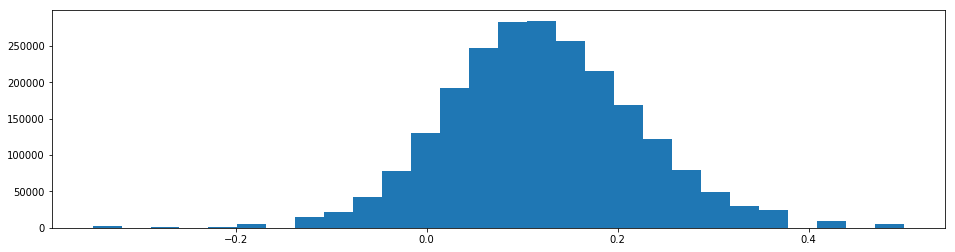

In [32]:
plt.figure(figsize=(16, 4))
plt.hist(data['CM2_GROUP'], weights=data['Totals'], 
     bins = 28, range=(data['CM2_GROUP'].min(), data['CM2_GROUP'].max()))

In [33]:
whole_sample = [np.repeat(a, b) for a, b in list(zip(histogram.index, histogram.values))]

In [34]:
len(whole_sample)

55

In [35]:
whole_sample

[array([-0.35, -0.35, -0.35, ..., -0.35, -0.35, -0.35]),
 array([-0.325, -0.325, -0.325, -0.325, -0.325, -0.325, -0.325, -0.325,
        -0.325, -0.325, -0.325, -0.325, -0.325, -0.325, -0.325, -0.325,
        -0.325, -0.325, -0.325, -0.325, -0.325, -0.325, -0.325, -0.325,
        -0.325, -0.325, -0.325, -0.325, -0.325, -0.325, -0.325, -0.325,
        -0.325, -0.325, -0.325, -0.325, -0.325, -0.325, -0.325, -0.325,
        -0.325, -0.325, -0.325, -0.325, -0.325, -0.325, -0.325, -0.325,
        -0.325, -0.325, -0.325, -0.325, -0.325, -0.325, -0.325, -0.325,
        -0.325, -0.325, -0.325, -0.325, -0.325, -0.325, -0.325, -0.325,
        -0.325, -0.325, -0.325, -0.325, -0.325, -0.325, -0.325, -0.325,
        -0.325, -0.325, -0.325, -0.325, -0.325, -0.325, -0.325, -0.325,
        -0.325, -0.325, -0.325, -0.325, -0.325, -0.325, -0.325, -0.325,
        -0.325, -0.325, -0.325, -0.325, -0.325, -0.325, -0.325, -0.325,
        -0.325, -0.325, -0.325, -0.325, -0.325, -0.325, -0.325, -0.325,
       

In [36]:
flatten_sample = [i for group in whole_sample for i in group]

In [37]:
len(flatten_sample)

2268286

In [38]:
data['Totals'].sum()

2268286.0

In [39]:
flatten_sample

[-0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,
 -0.35,


In [40]:
np.histogram(flatten_sample)

(array([  3348,   1640,  24637, 135710, 570877, 825377, 471059, 177503,
         43614,  14521], dtype=int64),
 array([-0.35 , -0.265, -0.18 , -0.095, -0.01 ,  0.075,  0.16 ,  0.245,
         0.33 ,  0.415,  0.5  ]))

(array([  2600.,    748.,   1640.,      0.,   4643.,  19994.,  40807.,
         94903., 252837., 318040., 378977., 446400., 277379., 193680.,
        115720.,  61783.,  18631.,  24983.,   9710.,   4811.]),
 array([-0.35  , -0.3075, -0.265 , -0.2225, -0.18  , -0.1375, -0.095 ,
        -0.0525, -0.01  ,  0.0325,  0.075 ,  0.1175,  0.16  ,  0.2025,
         0.245 ,  0.2875,  0.33  ,  0.3725,  0.415 ,  0.4575,  0.5   ]),
 <a list of 20 Patch objects>)

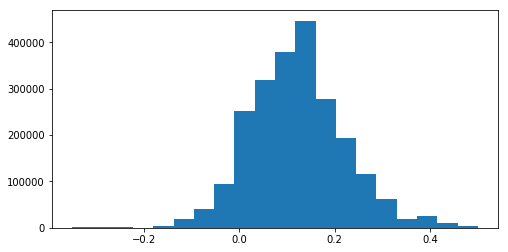

In [41]:
plt.figure(figsize=(8, 4))
plt.hist(flatten_sample, bins=20, range=(-.35, .5))

In [42]:
from scipy import stats

stats.percentileofscore(flatten_sample, 0.07, kind='strict')

28.602081042690386

In [43]:
np.percentile(flatten_sample, 30), np.percentile(flatten_sample, 35)

(0.07, 0.08)

With a CM2% between 7-8% we keep eligilble around 65-70% of the customers for accessing the Existing Customers SP for the first time

In [44]:
np.percentile(flatten_sample, 75), np.percentile(flatten_sample, 80)

(0.18, 0.2)

With a CM2% between 18-20% we keep eligilble around 20-25% of the customers for accessing the Existing Customers SP HIGH TIER for the first time

In [71]:
df = pd.DataFrame(columns=['SITE', 'TOTAL_CUS', 'PERC_20', 'PERC_25', 'PERC_30', 'PERC_35', 
                           'PERC_50', 'PERC_55', 'PERC_60', 'PERC_65', 'PERC_70', 'PERC_75',
                           'PERC_80', 'PERC_85', 'PERC_90'])

for i in data.columns[1:(len(data.columns) - 1)]:
    cus_data = data[['CM2_GROUP', i]]
    cus_amount = cus_data[i].sum()
    histogram = cus_data.groupby('CM2_GROUP')[i].sum()
    whole_sample = [np.repeat(a, b) for a, b in list(zip(histogram.index, histogram.values))]
    flatten_sample = [i for group in whole_sample for i in group]
    
    perc_20 = np.percentile(flatten_sample, 20)
    perc_25 = np.percentile(flatten_sample, 25)
    perc_30 = np.percentile(flatten_sample, 30)
    perc_35 = np.percentile(flatten_sample, 35)
    perc_50 = np.percentile(flatten_sample, 50)
    perc_55 = np.percentile(flatten_sample, 55)
    perc_60 = np.percentile(flatten_sample, 60)
    perc_65 = np.percentile(flatten_sample, 65)
    perc_70 = np.percentile(flatten_sample, 70)
    perc_75 = np.percentile(flatten_sample, 75)
    perc_80 = np.percentile(flatten_sample, 80)
    perc_85 = np.percentile(flatten_sample, 85)
    perc_90 = np.percentile(flatten_sample, 90)
    #print(i)
    #print('')
    #print('Total amount of customers : ', cus_amount)
    #print('')
    #print('Low Tier Values')
    #print('Percentile 30: ', np.round(perc_30, 2) * 100, '%')
    #print('Percentile 35: ', np.round(perc_35, 2) * 100, '%')
    #print('')
    #print('High Tier Values')
    #print('Percentile 75: ', np.round(perc_75, 2) * 100, '%')
    #print('Percentile 80: ', np.round(perc_80, 2) * 100, '%')
    #print('')
    #print('Percentile 50: ', np.round(perc_50, 2) * 100, '% (As emergency threshold in case of poor CM2% markets)')
    #print('')
    #print('_____________________________________________________________________________________________________________________')
    #print('')
    l = list([i, cus_amount, perc_20 * 100, perc_25 * 100, perc_30 * 100, perc_35 * 100, perc_50 * 100, 
              perc_55 * 100, perc_60 * 100, perc_65 * 100, perc_70 * 100, perc_75 * 100, perc_80 * 100,
              perc_85 * 100, perc_90 * 100])
    df1 = pd.DataFrame([l], columns=df.columns)
    df = df.append(df1, ignore_index=True)

In [72]:
df = df.drop(index=9)

In [73]:
df['R_THRES_LT'] = [5, 4, 5, 5, 6, 5, 5, 4, 2, 4, 4, 4, 3, 3, 6, 3, 4, 8, 0]

In [74]:
df['R_THRES_HT'] = [18, 16, 18, 17, 20, 19, 18, 16, 14, 17, 16, 16, 15, 15, 19, 15, 16, 30, 12]

In [75]:
#df[['PERC_30', 'PERC_35', 'PERC_50', 'PERC_75', 'PERC_80']] = df[['PERC_30', 'PERC_35', 'PERC_50', 'PERC_75', 'PERC_80']].astype(int)

In [76]:
ec_sp_low_tier_values = []

for i in range(len(df.index.values)):
    site = df.iloc[i]
    if site['PERC_30'] - 3 >= site['R_THRES_LT']:
        ec_sp_low_tier_values.append(site['PERC_30'])
    elif site['PERC_35'] - 3 >= site['R_THRES_LT']:
        ec_sp_low_tier_values.append(site['PERC_35'])
    else:
        ec_sp_low_tier_values.append(site['PERC_50'])

In [77]:
df['EC_SP_THRES_LT'] = ec_sp_low_tier_values

In [78]:
ec_sp_high_tier_values = []

for i in range(len(df.index.values)):
    site = df.iloc[i]
    if site['PERC_75'] - 5 >= site['R_THRES_HT']:
        ec_sp_high_tier_values.append(site['PERC_75'])
    else:
        ec_sp_high_tier_values.append(site['PERC_80'])

In [79]:
ec_sp_high_tier_values

[20.999999999999996,
 18.0,
 19.0,
 20.0,
 23.0,
 23.0,
 20.0,
 19.0,
 13.0,
 20.0,
 20.0,
 16.0,
 15.999999999999998,
 17.0,
 23.0,
 15.0,
 19.0,
 37.5,
 8.0]

In [80]:
df['EC_SP_THRES_HT'] = ec_sp_high_tier_values

In [81]:
#df[df.columns[1:]] = df[df.columns[1:]].astype(int)

In [82]:
df

,SITE,TOTAL_CUS,PERC_20,PERC_25,PERC_30,PERC_35,PERC_50,PERC_55,PERC_60,PERC_65,PERC_70,PERC_75,PERC_80,PERC_85,PERC_90,R_THRES_LT,R_THRES_HT,EC_SP_THRES_LT,EC_SP_THRES_HT
0,Belgium,36505.0,8.0,9.0,10.0,11.0,14.0,15.0,16.0,17.0,18.0,19.0,21.0,23.0,25.0,5,18,10.0,21.0
1,Bulgaria,4183.0,4.0,6.0,7.0,8.0,11.0,11.0,13.0,14.0,15.0,16.0,18.0,20.0,22.0,4,16,7.0,18.0
2,Croatia,6826.0,5.0,6.0,7.5,9.0,12.0,13.0,14.0,15.0,16.0,18.0,19.0,21.0,23.0,5,18,9.0,19.0
3,Czech,65687.0,7.0,8.0,9.0,10.0,13.0,14.0,15.0,16.0,17.0,18.0,20.0,22.0,24.0,5,17,9.0,20.0
4,Denmark,50446.0,7.0,9.0,11.0,12.0,15.0,17.0,18.0,19.0,20.0,22.0,23.0,25.0,27.0,6,20,11.0,23.0
5,Deutschland,532388.0,9.0,11.0,12.0,13.0,16.0,17.0,18.0,20.0,21.0,22.0,23.0,25.0,28.0,5,19,12.0,23.0
6,Finland,34317.0,8.0,9.0,10.0,11.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,22.0,24.0,5,18,10.0,20.0
7,France,406581.0,5.0,6.0,7.0,8.0,11.0,12.0,13.0,14.0,16.0,17.0,19.0,21.0,23.0,4,16,7.0,19.0
8,Hungary,26556.0,-1.0,1.0,2.0,3.0,6.0,7.0,8.0,9.0,10.0,11.0,13.0,15.0,17.0,2,14,6.0,13.0
10,Italy,166800.0,6.0,7.0,8.0,9.0,12.0,13.0,15.0,16.0,17.0,18.0,20.0,21.0,24.0,4,17,8.0,20.0


In [83]:
writer = pd.ExcelWriter('ec_sp_low_n_high_thresholds.xlsx', engine='xlsxwriter')
workbook = writer.book
format1 = workbook.add_format({'num_format': '0.00'})
df.to_excel(writer, index=False, encoding='utf-8')
writer.save()

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
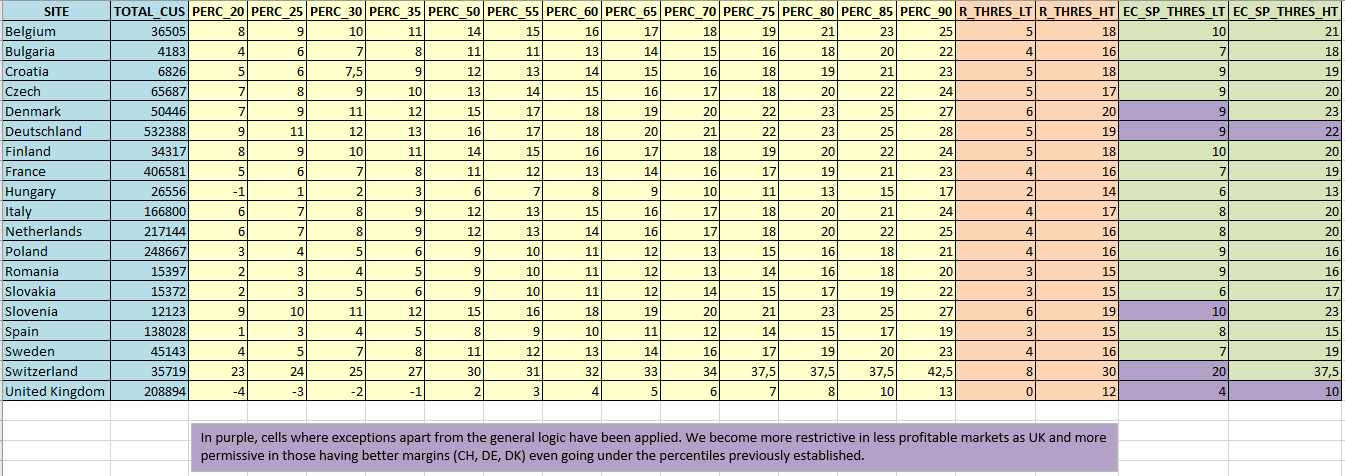